# Principal Component Analysis

Let's discuss PCA! this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm.

# PCA Review

Remember that PCA is just a transformation of your data 

# Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# The Data

Let's work with the cancer data set again since it had so many features

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# PCA Visualization
As ve've noriced before it is difficult to visualize hgh dimensional data, we can use PCA to find the first two principal componentsm and visualize the data in this new, two-dimensional space, with a single scatter-plot. before we do this though, we'll need to scale our data....

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(0,100))
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_data = scaler.transform(df)

In [13]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [14]:
df = pd.DataFrame(scaled_data, columns= cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [15]:
round(df.describe(),2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.03,-2.23,-1.98,-1.45,-3.11,-1.61,-1.11,-1.26,-2.74,-1.82,...,-1.73,-2.22,-1.69,-1.22,-2.68,-1.44,-1.31,-1.75,-2.16,-1.60
25%,-0.69,-0.73,-0.69,-0.67,-0.71,-0.75,-0.74,-0.74,-0.70,-0.72,...,-0.67,-0.75,-0.69,-0.64,-0.69,-0.68,-0.76,-0.76,-0.64,-0.69
50%,-0.22,-0.10,-0.24,-0.30,-0.03,-0.22,-0.34,-0.40,-0.07,-0.18,...,-0.27,-0.04,-0.29,-0.34,-0.05,-0.27,-0.22,-0.22,-0.13,-0.22
75%,0.47,0.58,0.50,0.36,0.64,0.49,0.53,0.65,0.53,0.47,...,0.52,0.66,0.54,0.36,0.60,0.54,0.53,0.71,0.45,0.45
max,3.97,4.65,3.98,5.25,4.77,4.57,4.24,3.93,4.48,4.91,...,4.09,3.89,4.29,5.93,3.96,5.11,4.70,2.69,6.05,6.85


[Text(0, 0, 'mean radius'),
 Text(0, 0, 'mean texture'),
 Text(0, 0, 'mean perimeter'),
 Text(0, 0, 'mean area'),
 Text(0, 0, 'mean smoothness'),
 Text(0, 0, 'mean compactness'),
 Text(0, 0, 'mean concavity'),
 Text(0, 0, 'mean concave points'),
 Text(0, 0, 'mean symmetry'),
 Text(0, 0, 'mean fractal dimension'),
 Text(0, 0, 'radius error'),
 Text(0, 0, 'texture error'),
 Text(0, 0, 'perimeter error'),
 Text(0, 0, 'area error'),
 Text(0, 0, 'smoothness error'),
 Text(0, 0, 'compactness error'),
 Text(0, 0, 'concavity error'),
 Text(0, 0, 'concave points error'),
 Text(0, 0, 'symmetry error'),
 Text(0, 0, 'fractal dimension error'),
 Text(0, 0, 'worst radius'),
 Text(0, 0, 'worst texture'),
 Text(0, 0, 'worst perimeter'),
 Text(0, 0, 'worst area'),
 Text(0, 0, 'worst smoothness'),
 Text(0, 0, 'worst compactness'),
 Text(0, 0, 'worst concavity'),
 Text(0, 0, 'worst concave points'),
 Text(0, 0, 'worst symmetry'),
 Text(0, 0, 'worst fractal dimension')]

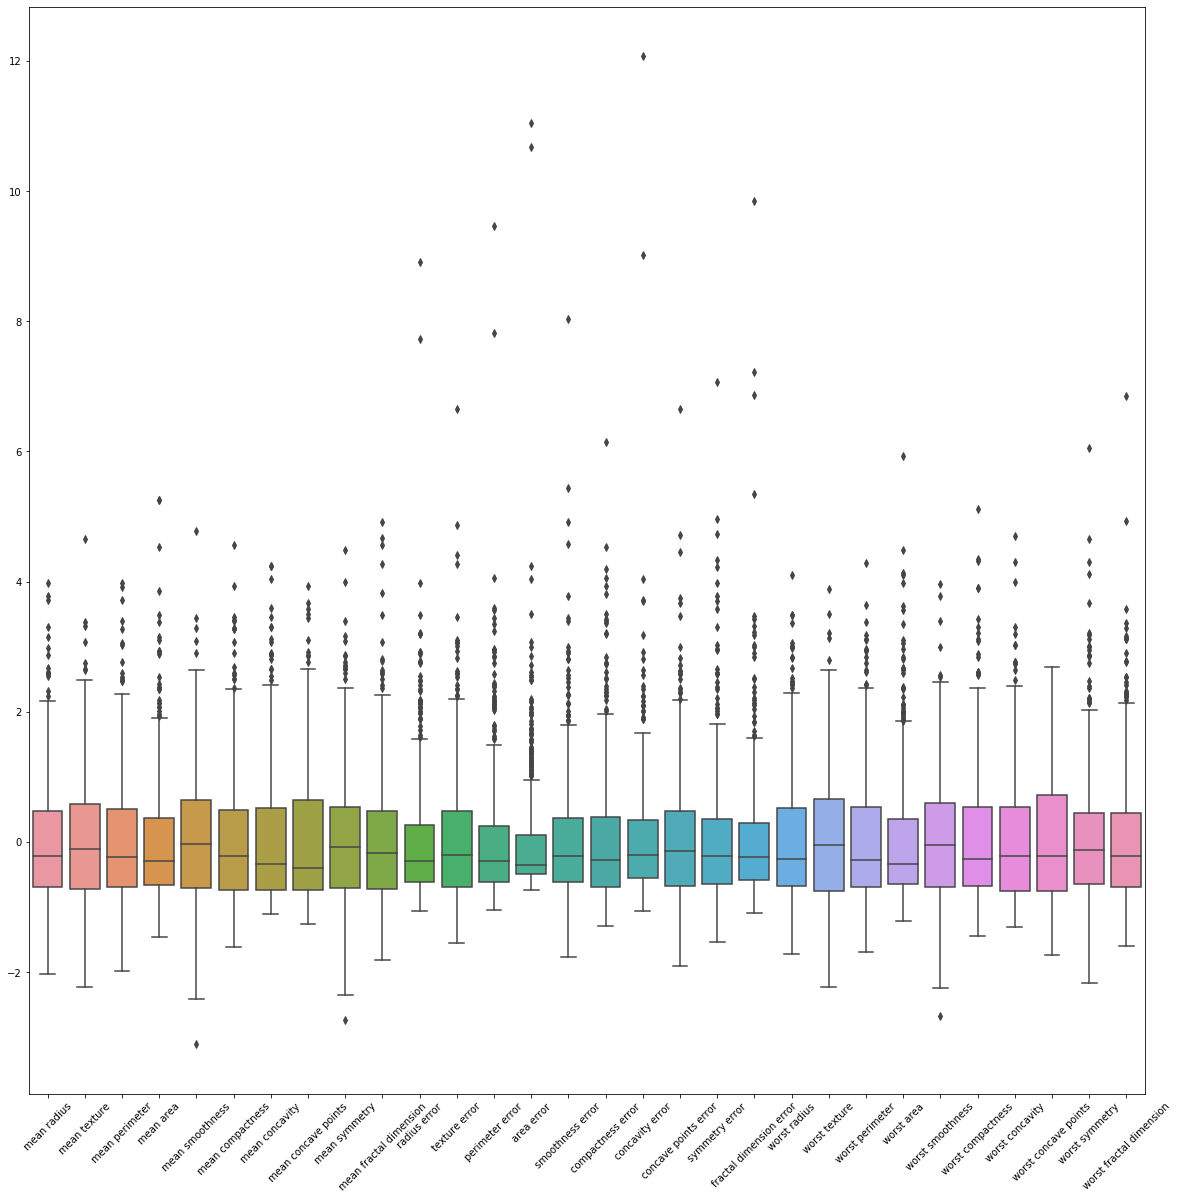

In [16]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [17]:
dfHasilMelt = pd.melt(df)
dfHasilMelt.head()

,variable,value
0,mean radius,1.097064
1,mean radius,1.829821
2,mean radius,1.579888
3,mean radius,-0.768909
4,mean radius,1.750297


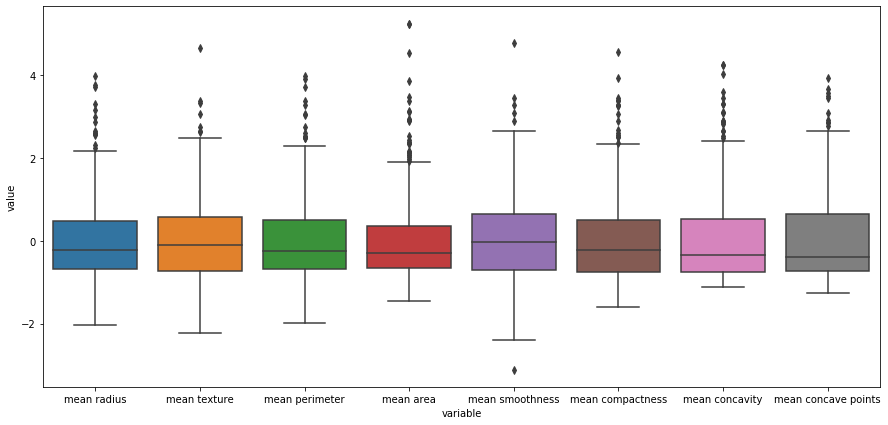

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(x='variable', y='value', data=pd.melt(df[df.columns[0:8]]))

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [23]:
x_pca = pca.transform(df)

In [24]:
scaled_data.shape

(569, 30)

In [25]:
x_pca.shape

(569, 2)

In [31]:
dfpca = pd.DataFrame(x_pca, columns=['PC 1', 'PC 2'])
dfpca['Benign'] = cancer['target']
dfpca.head()

,PC 1,PC 2,Benign
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


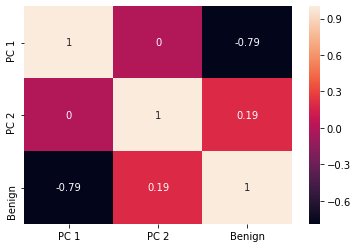

In [32]:
sns.heatmap(round(dfpca.corr(),2), annot=True)

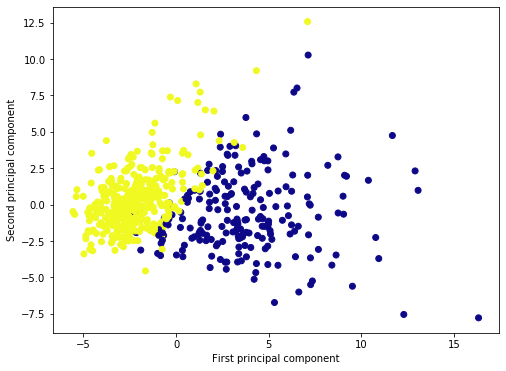

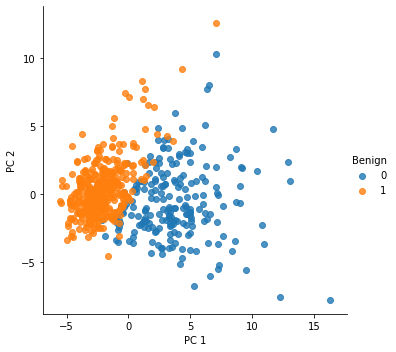

In [33]:
plt.figure(figsize=(8,6))
# plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma')
plt.scatter(dfpca['PC 1'], dfpca['PC 2'], c=dfpca['Benign'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

sns.lmplot(x = 'PC 1', y='PC 2', hue='Benign', data=dfpca, fit_reg=False)

# Interpreting the Components
unfortunetly, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

the components correspond to combinations of the original features, the components themselved are stored as an attribute of the fitted PCA object.

In [34]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

in this numpy array, each row represents principal component, and each column relates back to the original features. we can visualize this rel with a heatmap.

In [35]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'], index =['PC 1', 'PC 2'])

In [36]:
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC 1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC 2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


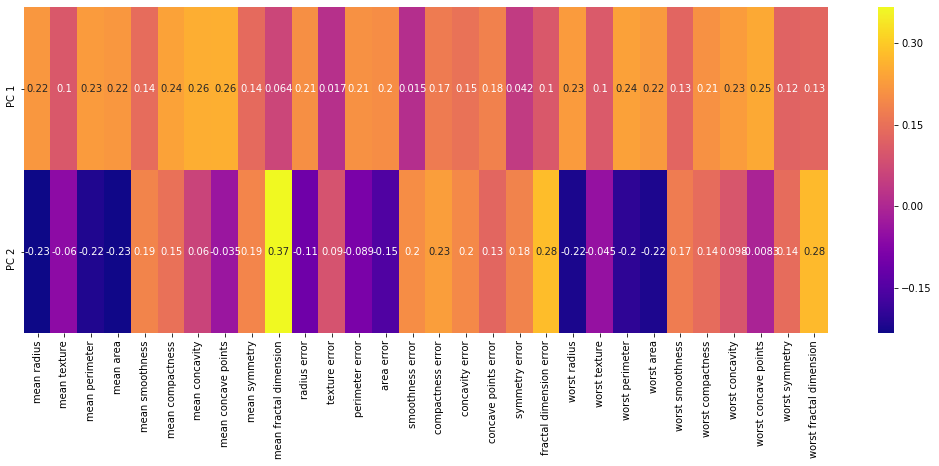

In [37]:
plt.figure(figsize=(18,6))
sns.heatmap(df_comp, cmap='plasma', annot=True)